In [2]:
import os
import numpy as np
import pandas as pd
titanic_path= r"C:\Users\Lucid\Downloads"
def load_data(titanic_csv):
    csv_path= os.path.join(titanic_path, titanic_csv)
    return pd.read_csv(csv_path)
    

In [3]:
titanic_train= load_data("train.csv")
print(titanic_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
titanic_test= load_data("test.csv")
print(titanic_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [6]:
#implementing EDA-Exploratory Data Analysis
#exploring the size of the data
print("train shape:", titanic_train.shape)
print("test shape:",titanic_test.shape)

train shape: (891, 12)
test shape: (418, 11)


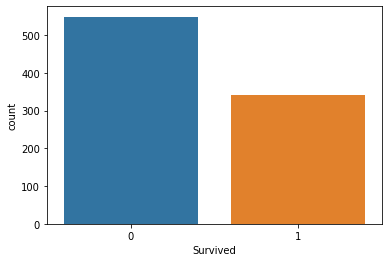

In [7]:
#Exploring the target feature properties
sb.countplot(titanic_train.Survived)

In [8]:
round(np.mean(titanic_train['Survived']),2)

0.38

In [9]:
print(titanic_train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [10]:
titanic_train.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
titanic_train.isnull().mean().sort_values(ascending= False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

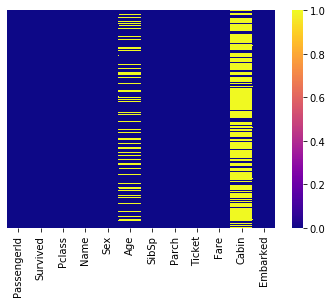

In [12]:
sb.heatmap(titanic_train.isnull(),yticklabels=False ,cmap="plasma")

In [13]:
print(titanic_train.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Turja, Miss. Anna Sofia  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

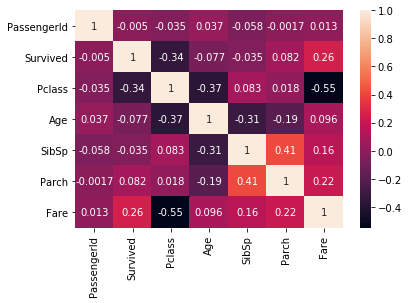

In [14]:
sb.heatmap(titanic_train.corr(), annot= True)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


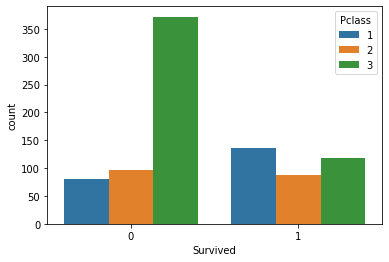

In [15]:
sb.countplot(x='Survived', hue='Pclass', data= titanic_train)
print(titanic_train.Age.head())

In [16]:
#we are going to replace the missing values with the median of the present data
age_group= titanic_train.groupby(["Sex","Pclass"])["Age"]
print(age_group.median())

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [17]:
#.loc is used to access columns/rows or a boolean array
titanic_train.loc[titanic_train.Age.isnull(),'Age']= titanic_train.groupby(["Sex","Pclass"]).Age.transform('median')
print(titanic_train.Age.isnull().sum())
print("Age data:", titanic_train.Age.head())

0
Age data: 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


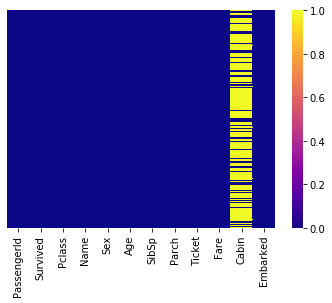

In [18]:
sb.heatmap(titanic_train.isnull(),yticklabels=False ,cmap="plasma")

In [19]:
#The Cabin attribute has too many missing values so we must discard it.
titanic_train.drop('Cabin', axis = 1,inplace= True)


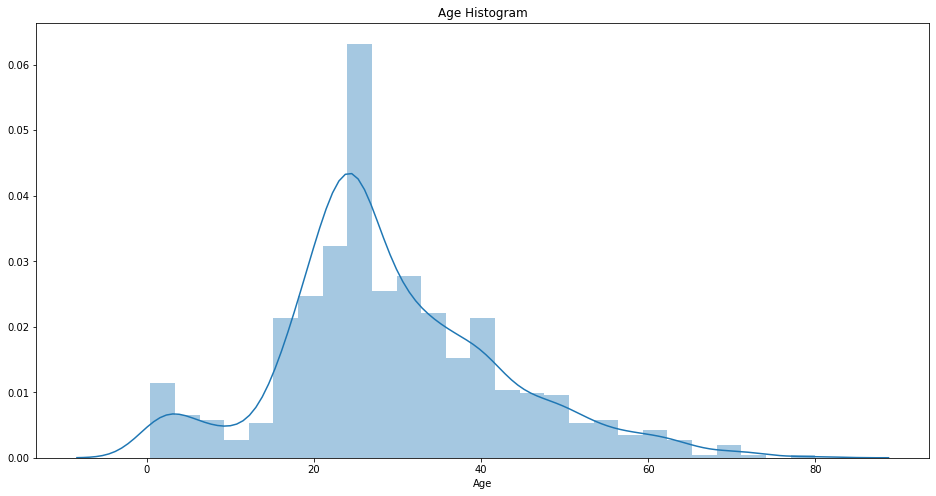

In [20]:
plt.figure(figsize=(16,8))
sb.distplot(titanic_train["Age"])
plt.title("Age Histogram")
plt.xlabel("Age")
plt.show()

In [21]:
print(titanic_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [22]:
#checking all the other null values
titanic_train.isnull().sum().sort_values(ascending= False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

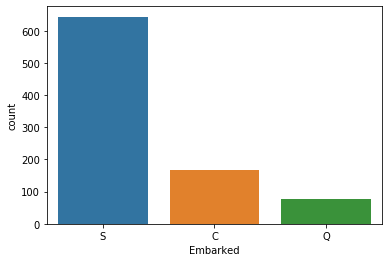

In [23]:
#we can determine that most Embarked features are 'S' class
sb.countplot(x=titanic_train.Embarked)

In [24]:
#filling the empty values with S
titanic_train['Embarked']= titanic_train.Embarked.fillna("S")
#there are no more missing values
print(titanic_train.isnull().sum().sort_values(ascending=False))

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64


In [25]:
#Converting Sex and Embarked into integer values
titanic_train['Sex'][titanic_train['Sex']=="male"]=0
titanic_train['Sex'][titanic_train["Sex"]=="female"]=1
titanic_train['Embarked'][titanic_train['Embarked']=="S"]=0
titanic_train['Embarked'][titanic_train['Embarked']=="C"]=1
titanic_train['Embarked'][titanic_train['Embarked']=="Q"]=2
print("Sex:",titanic_train.Sex.head())
print("Embarked:",titanic_train.Embarked.head())

Sex: 0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object
Embarked: 0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: object


In [26]:
#dropping the other features for now
titanic_train.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [28]:
#local validation.
#axis=0 is column-wise calculation and axis=1 is row-wise calculation.
#using the train_test_split function.
#Here we have split training dataset into two datasets, one without the Survived feature and one with only the Survived feature.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(titanic_train.drop(['Survived'],axis=1), titanic_train['Survived'],test_size=0.2,random_state=2)

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions=logistic_regression.predict(X_test)
print(predictions)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [34]:
#the round function to round the decimals to 2 digits
round(np.mean(predictions),2)

0.33

In [45]:
#using a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))

[[90 10]
 [30 49]]


In [55]:
#accuracy of approx. 78%
accuracy= (90+49)/(90+10+30+49)
print(accuracy)
print(str(len(predictions)))
total_rows=len(titanic_test.axes[0])
print(total_rows)
print(titanic_test.Survived.isnull().sum())

0.776536312849162
179
418
78
